# Payment Date Prediction 


### Importing related Libraries 

In [86]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import VarianceThreshold
from sklearn import preprocessing

### Store the dataset into the Dataframe


In [2]:
data = pd.read_csv('dataset.csv')

### Check the shape of the dataframe


In [3]:
data.shape

(50000, 19)

### Check the Detail information of the dataframe

In [4]:
data.head()

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR corp,2020-02-11 00:00:00,2020.0,1.930438e+09,2020-01-26,20200125,20200126,20200210.0,USD,RV,1.0,NaN,54273.28,20200126.0,NAH4,1.930438e+09,0
1,U001,0200980828,BEN E,2019-08-08 00:00:00,2019.0,1.929646e+09,2019-07-22,20190722,20190722,20190811.0,USD,RV,1.0,NaN,79656.60,20190722.0,NAD1,1.929646e+09,0
2,U001,0200792734,MDV/ trust,2019-12-30 00:00:00,2019.0,1.929874e+09,2019-09-14,20190914,20190914,20190929.0,USD,RV,1.0,NaN,2253.86,20190914.0,NAA8,1.929874e+09,0
3,CA02,0140105686,SYSC llc,NaN,2020.0,2.960623e+09,2020-03-30,20200330,20200330,20200410.0,CAD,RV,1.0,NaN,3299.70,20200331.0,CA10,2.960623e+09,1
4,U001,0200769623,WAL-MAR foundation,2019-11-25 00:00:00,2019.0,1.930148e+09,2019-11-13,20191113,20191113,20191128.0,USD,RV,1.0,NaN,33133.29,20191113.0,NAH4,1.930148e+09,0


### Display All the column names

In [5]:
data.columns

Index(['business_code', 'cust_number', 'name_customer', 'clear_date',
       'buisness_year', 'doc_id', 'posting_date', 'document_create_date',
       'document_create_date.1', 'due_in_date', 'invoice_currency',
       'document type', 'posting_id', 'area_business', 'total_open_amount',
       'baseline_create_date', 'cust_payment_terms', 'invoice_id', 'isOpen'],
      dtype='object')

### Describe the entire dataset

In [6]:
data.describe()

,buisness_year,doc_id,document_create_date,document_create_date.1,due_in_date,posting_id,area_business,total_open_amount,baseline_create_date,invoice_id,isOpen
count,50000.000000,5.000000e+04,5.000000e+04,5.000000e+04,5.000000e+04,50000.0,0.0,50000.000000,5.000000e+04,4.999400e+04,50000.000000
mean,2019.305700,2.012238e+09,2.019351e+07,2.019354e+07,2.019368e+07,1.0,NaN,32337.021651,2.019354e+07,2.011340e+09,0.200000
std,0.460708,2.885235e+08,4.496041e+03,4.482134e+03,4.470614e+03,0.0,NaN,39205.975231,4.482701e+03,2.766335e+08,0.400004
min,2019.000000,1.928502e+09,2.018123e+07,2.018123e+07,2.018122e+07,1.0,NaN,0.720000,2.018121e+07,1.928502e+09,0.000000
25%,2019.000000,1.929342e+09,2.019050e+07,2.019051e+07,2.019052e+07,1.0,NaN,4928.312500,2.019050e+07,1.929342e+09,0.000000
50%,2019.000000,1.929964e+09,2.019091e+07,2.019091e+07,2.019093e+07,1.0,NaN,17609.010000,2.019091e+07,1.929964e+09,0.000000
75%,2020.000000,1.930619e+09,2.020013e+07,2.020013e+07,2.020022e+07,1.0,NaN,47133.635000,2.020013e+07,1.930619e+09,0.000000
max,2020.000000,9.500000e+09,2.020052e+07,2.020052e+07,2.020071e+07,1.0,NaN,668593.360000,2.020052e+07,2.960636e+09,1.000000


# Data Cleaning

- Show top 5 records from the dataset

In [7]:
data.head(5)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,document_create_date,document_create_date.1,due_in_date,invoice_currency,document type,posting_id,area_business,total_open_amount,baseline_create_date,cust_payment_terms,invoice_id,isOpen
0,U001,0200769623,WAL-MAR corp,2020-02-11 00:00:00,2020.0,1.930438e+09,2020-01-26,20200125,20200126,20200210.0,USD,RV,1.0,NaN,54273.28,20200126.0,NAH4,1.930438e+09,0
1,U001,0200980828,BEN E,2019-08-08 00:00:00,2019.0,1.929646e+09,2019-07-22,20190722,20190722,20190811.0,USD,RV,1.0,NaN,79656.60,20190722.0,NAD1,1.929646e+09,0
2,U001,0200792734,MDV/ trust,2019-12-30 00:00:00,2019.0,1.929874e+09,2019-09-14,20190914,20190914,20190929.0,USD,RV,1.0,NaN,2253.86,20190914.0,NAA8,1.929874e+09,0
3,CA02,0140105686,SYSC llc,NaN,2020.0,2.960623e+09,2020-03-30,20200330,20200330,20200410.0,CAD,RV,1.0,NaN,3299.70,20200331.0,CA10,2.960623e+09,1
4,U001,0200769623,WAL-MAR foundation,2019-11-25 00:00:00,2019.0,1.930148e+09,2019-11-13,20191113,20191113,20191128.0,USD,RV,1.0,NaN,33133.29,20191113.0,NAH4,1.930148e+09,0


### Display the Null values percentage against every columns (compare to the total number of records)

- Output expected : area_business - 100% null, clear_data = 20% null, invoice_id = 0.12% null

null_vals = data.isnull().sum().to_frame(name = 'NULL_COUNTS')
null_vals = null_vals[null_vals['NULL_COUNTS']>0]

In [8]:
for col in data.columns:
    null_val = data[col].isnull().sum()
    percent = (((50000-null_val)/50000)*100)
    if(percent<100):
        print(col,"=",abs(percent-100),"%")

clear_date = 20.0 %
area_business = 100.0 %
invoice_id = 0.012000000000000455 %


### Display Invoice_id and Doc_Id

- Note - Many of the would have same invoice_id and doc_id


In [9]:
data[['invoice_id','doc_id']]

,invoice_id,doc_id
0,1.930438e+09,1.930438e+09
1,1.929646e+09,1.929646e+09
2,1.929874e+09,1.929874e+09
3,2.960623e+09,2.960623e+09
4,1.930148e+09,1.930148e+09
...,...,...
49995,1.930797e+09,1.930797e+09
49996,1.929744e+09,1.929744e+09
49997,1.930537e+09,1.930537e+09
49998,1.930199e+09,1.930199e+09


#### Write a code to check - 'baseline_create_date',"document_create_date",'document_create_date.1' - these columns are almost same.

- Please note, if they are same, we need to drop them later



In [10]:
date_list=['baseline_create_date','document_create_date','document_create_date.1']
for i in range(len(date_list)):
    for j in range(i + 1, len(date_list)):
        data['equal'] = np.where( data[date_list[i]] == data[date_list[j]] , '1', '0')
        print(date_list[i],"and",date_list[j],"are",((data['equal'].value_counts()[1])/data.shape[0])*100,"% same")

        

baseline_create_date and document_create_date are 31.926 % same
baseline_create_date and document_create_date.1 are 11.096 % same
document_create_date and document_create_date.1 are 42.464 % same


In [11]:
data.drop('equal',axis=1,inplace=True)

#### Please check, Column 'posting_id' is constant columns or not


In [12]:
if(data['posting_id'].nunique()==1):
    print("posting_id is Constant")


posting_id is Constant


#### Please check 'isOpen' is a constant column and relevant column for this project or not

In [13]:
if(data['isOpen'].nunique()==1):
    print("isOpen is Constant")
print("isOpen is relevent column for this project ")


isOpen is relevent column for this project 


### Write the code to drop all the following columns from the dataframe

- 'area_business'
- "posting_id"
- "invoice_id"
- "document_create_date"
- "isOpen"
- 'document type' 
- 'document_create_date.1

In [14]:
data.drop(columns=['area_business','posting_id','invoice_id','document_create_date','isOpen','document type','document_create_date.1'],inplace=True)


### Please check from the dataframe whether all the columns are removed or not 

In [15]:
list_check = ['area_business','posting_id','invoice_id','document_create_date','isOpen','document type','document_create_date.1']
for i in list_check:
    if i in data.columns:
        print("false")
print("removed")

removed


### Show all the Dublicate rows from the dataframe

In [16]:
duplicate = data[data.duplicated()]
print("Duplicate Rows :")
duplicate
 

Duplicate Rows :


,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,invoice_currency,total_open_amount,baseline_create_date,cust_payment_terms
1041,U001,0200769623,WAL-MAR in,2019-03-12 00:00:00,2019.0,1.928870e+09,2019-02-28,20190315.0,USD,19557.41,20190228.0,NAH4
2400,U001,0200769623,WAL-MAR trust,2019-08-28 00:00:00,2019.0,1.929758e+09,2019-08-18,20190902.0,USD,5600.41,20190818.0,NAH4
2584,U001,0200769623,WAL-MAR corporation,2019-12-16 00:00:00,2019.0,1.930217e+09,2019-12-04,20191219.0,USD,35352.17,20191204.0,NAH4
3755,U001,0200769623,WAL-MAR,2019-11-22 00:00:00,2019.0,1.930137e+09,2019-11-12,20191127.0,USD,2982.64,20191112.0,NAH4
3873,CA02,0140104409,LOB associates,NaN,2020.0,2.960629e+09,2020-04-14,20200425.0,CAD,82975.82,20200415.0,CA10
...,...,...,...,...,...,...,...,...,...,...,...,...
49928,U001,0200915438,GROC trust,2019-08-15 00:00:00,2019.0,1.929646e+09,2019-07-25,20190809.0,USD,6969.00,20190725.0,NAA8
49963,U001,0200759878,SA us,2019-01-29 00:00:00,2019.0,1.928614e+09,2019-01-13,20190128.0,USD,10968.24,20190113.0,NAH4
49986,U001,0200772670,ASSOCIAT foundation,2019-06-12 00:00:00,2019.0,1.929403e+09,2019-05-29,20190613.0,USD,155837.53,20190529.0,NAU5
49990,U001,0200765011,MAINES llc,2019-06-06 00:00:00,2019.0,1.929365e+09,2019-05-22,20190606.0,USD,4008.05,20190522.0,NAA8


### Display the Number of Dublicate Rows

In [17]:
duplicate.shape[0]

1161

### Drop all the Dublicate Rows

In [18]:
data.drop_duplicates(inplace=True)

#### Now check for all dublicate rows now

- Note - It must be 0 by now

In [19]:
data.duplicated().sum()

0

### Check for the number of Rows and Columns in your dataset

In [20]:
data.shape

(48839, 12)

### Find out the total count of null values in each columns

In [21]:
for i in data.columns:
    null_count = data[i].isnull().sum()
    print(i,"=",null_count)

business_code = 0
cust_number = 0
name_customer = 0
clear_date = 9681
buisness_year = 0
doc_id = 0
posting_date = 0
due_in_date = 0
invoice_currency = 0
total_open_amount = 0
baseline_create_date = 0
cust_payment_terms = 0


#Data type Conversion 

### Please check the data type of each column of the dataframe

In [22]:
data.dtypes

business_code            object
cust_number              object
name_customer            object
clear_date               object
buisness_year           float64
doc_id                  float64
posting_date             object
due_in_date             float64
invoice_currency         object
total_open_amount       float64
baseline_create_date    float64
cust_payment_terms       object
dtype: object

### Check the datatype format of below columns

- clear_date  
- posting_date
- due_in_date 
- baseline_create_date

In [23]:
date_lists = ['clear_date','posting_date','due_in_date','baseline_create_date']
for i in date_lists:
    print(i,"=",data[i].dtype)

clear_date = object
posting_date = object
due_in_date = float64
baseline_create_date = float64


### converting date columns into date time formats

- clear_date  
- posting_date
- due_in_date 
- baseline_create_date


- **Note - You have to convert all these above columns into "%Y%m%d" format**

In [24]:
data['due_in_date'] = pd.to_datetime(data['due_in_date'],format='%Y%m%d')
data['baseline_create_date'] = pd.to_datetime(data['baseline_create_date'],format='%Y%m%d')

In [25]:
data['posting_date'] = pd.to_datetime(data['posting_date'])
data['clear_date'] = pd.to_datetime(data['clear_date'])


### Please check the datatype of all the columns after conversion of the above 4 columns

In [26]:
date_lists = ['clear_date','posting_date','due_in_date','baseline_create_date']
for i in date_lists:
    print(i,"=",data[i].dtype)

clear_date = datetime64[ns]
posting_date = datetime64[ns]
due_in_date = datetime64[ns]
baseline_create_date = datetime64[ns]


#### the invoice_currency column contains two different categories, USD and CAD

- Please do a count of each currency 

In [27]:
a = data['invoice_currency'].value_counts()
a

USD    45011
CAD     3828
Name: invoice_currency, dtype: int64

#### display the "total_open_amount" column value

In [28]:
data['total_open_amount']

0        54273.28
1        79656.60
2         2253.86
3         3299.70
4        33133.29
           ...   
49995     3187.86
49996     6766.54
49997     6120.86
49998       63.48
49999     1790.30
Name: total_open_amount, Length: 48839, dtype: float64

### Convert all CAD into USD currency of "total_open_amount" column

- 1 CAD = 0.7 USD
- Create a new column i.e "converted_usd" and store USD and convered CAD to USD

In [29]:
data["converted_usd"]=np.where(data["invoice_currency"]=='CAD',data["total_open_amount"]*0.7,data[ "total_open_amount"])

### Display the new "converted_usd" column values

In [30]:
data["converted_usd"]

0        54273.28
1        79656.60
2         2253.86
3         2309.79
4        33133.29
           ...   
49995     3187.86
49996     6766.54
49997     6120.86
49998       63.48
49999     1790.30
Name: converted_usd, Length: 48839, dtype: float64

### Display year wise total number of record 

- Note -  use "buisness_year" column for this 

In [31]:
data['buisness_year'].value_counts()

2019.0    33975
2020.0    14864
Name: buisness_year, dtype: int64

### Write the code to delete the following columns 

- 'invoice_currency'
- 'total_open_amount', 

In [32]:
data.drop(['invoice_currency','total_open_amount'],axis=1,inplace=True)

### Write a code to check the number of columns in dataframe

In [33]:
data.shape[1]

11

# Splitting the Dataset 

### Look for all columns containing null value

- Note - Output expected is only one column 

In [34]:
data.isnull().any()

business_code           False
cust_number             False
name_customer           False
clear_date               True
buisness_year           False
doc_id                  False
posting_date            False
due_in_date             False
baseline_create_date    False
cust_payment_terms      False
converted_usd           False
dtype: bool

#### Find out the number of null values from the column that you got from the above code

In [35]:
data['clear_date'].isnull().sum()

9681

### On basis of the above column we are spliting data into dataset

- First dataframe (refer that as maindata) only containing the rows, that have not NULL data in that column ( This is going to be our train dataset ) 
- Second dataframe (refer that as nulldata) that contains the columns, that have Null data in that column ( This is going to be our test dataset ) 

In [36]:
main_data = data[data['clear_date'].isnull() == False]

In [37]:
null_data = data[data['clear_date'].isnull() == True]

### Check the number of Rows and Columns for both the dataframes 

In [38]:
main_data.shape

(39158, 11)

In [39]:
null_data.shape

(9681, 11)

### Display the 5 records from maindata and nulldata dataframes

In [40]:
main_data.head(5)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,1.930438e+09,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.280
1,U001,0200980828,BEN E,2019-08-08,2019.0,1.929646e+09,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.600
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,1.929874e+09,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.860
4,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,1.930148e+09,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.290
5,CA02,0140106181,THE corporation,2019-12-04,2019.0,2.960581e+09,2019-09-20,2019-10-04,2019-09-24,CA10,15558.088


In [41]:
null_data.head(5)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
3,CA02,0140105686,SYSC llc,NaT,2020.0,2.960623e+09,2020-03-30,2020-04-10,2020-03-31,CA10,2309.79
7,U001,0200744019,TARG us,NaT,2020.0,1.930659e+09,2020-03-19,2020-04-03,2020-03-19,NAA8,11173.02
10,U001,0200418007,AM,NaT,2020.0,1.930611e+09,2020-03-11,2020-03-26,2020-03-11,NAA8,3525.59
14,U001,0200739534,OK systems,NaT,2020.0,1.930788e+09,2020-04-15,2020-04-30,2020-04-15,NAA8,121105.65
15,U001,0200353024,DECA corporation,NaT,2020.0,1.930817e+09,2020-04-23,2020-04-26,2020-04-16,NAM2,3726.06


## Considering the **maindata**

#### Generate a new column "Delay" from the existing columns

- Note - You are expected to create a new column 'Delay' from two existing columns, "clear_date" and "due_in_date" 
- Formula - Delay = clear_date - due_in_date

In [42]:
main_data['delay']=main_data['clear_date']-main_data['due_in_date']
#main_data['delay'].dt.days.astype('int')
main_data['delay']

<ipython-input-42-dd971fefcd41>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_data['delay']=main_data['clear_date']-main_data['due_in_date']


0        1 days
1       -3 days
2       92 days
4       -3 days
5       61 days
          ...  
49994    0 days
49996    4 days
49997    0 days
49998    0 days
49999   -9 days
Name: delay, Length: 39158, dtype: timedelta64[ns]

### Generate a new column "avgdelay" from the existing columns

- Note - You are expected to make a new column "avgdelay" by grouping "name_customer" column with reapect to mean of the "Delay" column.
- This new column "avg_delay" is meant to store "customer_name" wise delay
- groupby('name_customer')['Delay'].mean(numeric_only=False)
- Display the new "avg_delay" column

In [43]:
avg_delay= main_data.groupby('name_customer')['delay'].mean(numeric_only=False)

## You need to add the "avg_delay" column with the maindata, mapped with "name_customer" column

 - Note - You need to use map function to map the avgdelay with respect to "name_customer" column

In [44]:
main_data['avg_delay'] = main_data['name_customer'].map(avg_delay)
main_data['avg_delay'] 

<ipython-input-44-5234d6cb5203>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_data['avg_delay'] = main_data['name_customer'].map(avg_delay)


0       -3 days +07:08:49.779837
1               19 days 00:00:00
2         8 days 02:10:54.545454
4       -3 days +19:33:27.692307
5               71 days 10:40:00
                  ...           
49994          -1 days +14:45:00
49996   -3 days +12:40:08.540925
49997     1 days 01:08:34.285714
49998     1 days 13:36:42.985074
49999   -4 days +02:20:52.173913
Name: avg_delay, Length: 39158, dtype: timedelta64[ns]

### Observe that the "avg_delay" column is in days format. You need to change the format into seconds

- Days_format :  17 days 00:00:00
- Format in seconds : 1641600.0

In [45]:
main_data['avg_delay'] = main_data['avg_delay'].dt.total_seconds()
main_data['avg_delay']

<ipython-input-45-b0d6fd00d17d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_data['avg_delay'] = main_data['avg_delay'].dt.total_seconds()


0       -2.334702e+05
1        1.641600e+06
2        6.990545e+05
4       -1.887923e+05
5        6.172800e+06
             ...     
49994   -3.330000e+04
49996   -2.135915e+05
49997    9.051429e+04
49998    1.354030e+05
49999   -3.371478e+05
Name: avg_delay, Length: 39158, dtype: float64

### Display the maindata dataframe 

In [46]:
main_data.head(5)

,business_code,cust_number,name_customer,clear_date,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd,delay,avg_delay
0,U001,0200769623,WAL-MAR corp,2020-02-11,2020.0,1.930438e+09,2020-01-26,2020-02-10,2020-01-26,NAH4,54273.280,1 days,-2.334702e+05
1,U001,0200980828,BEN E,2019-08-08,2019.0,1.929646e+09,2019-07-22,2019-08-11,2019-07-22,NAD1,79656.600,-3 days,1.641600e+06
2,U001,0200792734,MDV/ trust,2019-12-30,2019.0,1.929874e+09,2019-09-14,2019-09-29,2019-09-14,NAA8,2253.860,92 days,6.990545e+05
4,U001,0200769623,WAL-MAR foundation,2019-11-25,2019.0,1.930148e+09,2019-11-13,2019-11-28,2019-11-13,NAH4,33133.290,-3 days,-1.887923e+05
5,CA02,0140106181,THE corporation,2019-12-04,2019.0,2.960581e+09,2019-09-20,2019-10-04,2019-09-24,CA10,15558.088,61 days,6.172800e+06


### Since you have created the "avg_delay" column from "Delay" and "clear_date" column, there is no need of these two columns anymore 

- You are expected to drop "Delay" and "clear_date" columns from maindata dataframe 

# Splitting of Train and the Test Data

### You need to split the "maindata" columns into x and y dataframe

- Note - y should have the target column i.e. "avg_delay" and the other column should be in x

- x is going to hold the source fields and y will be going to hold the target fields

In [48]:
y= main_data['avg_delay'].to_frame()

In [49]:
x = main_data.drop(['avg_delay'],axis=1)

#### You are expected to split both the dataframes into train and test format in 60:40 ratio 

- Note - The expected output should be in "x_train", "x_loc_test", "y_train", "y_loc_test" format 

In [50]:
x_train,x_loc_test,y_train,y_loc_test=train_test_split(x,y,test_size=0.4)


### Please check for the number of rows and columns of all the new dataframes (all 4)

In [51]:
print("Shape of x_train is",x_train.shape)
print("Shape of x_loc_test is",x_loc_test.shape)
print("Shape of y_train is",y_train.shape)
print("Shape of y_loc_train is",y_loc_test.shape)

Shape of x_train is (23494, 10)
Shape of x_loc_test is (15664, 10)
Shape of y_train is (23494, 1)
Shape of y_loc_train is (15664, 1)


### Now you are expected to split the "x_loc_test" and "y_loc_test" dataset into "Test" and "Validation" (as the names given below) dataframe with 50:50 format 

- Note - The expected output should be in "x_val", "x_test", "y_val", "y_test" format

In [52]:
x_val,x_test,y_val,y_test = train_test_split(x_loc_test,y_loc_test,test_size=0.4)

### Please check for the number of rows and columns of all the 4 dataframes 

In [53]:
print("Shape of x_val is",x_val.shape)
print("Shape of x_test is",x_test.shape)
print("Shape of y_val is",y_val.shape)
print("Shape of y_test is",y_test.shape)

Shape of x_val is (9398, 10)
Shape of x_test is (6266, 10)
Shape of y_val is (9398, 1)
Shape of y_test is (6266, 1)


# Exploratory Data Analysis (EDA) 

### Distribution Plot of the target variable (use the dataframe which contains the target field)

- Note - You are expected to make a distribution plot for the target variable 

### You are expected to group the x_train dataset on 'name_customer' column with 'doc_id' in the x_train set

### Need to store the outcome into a new dataframe 

- Note code given for groupby statement- x_train.groupby(by=['name_customer'], as_index=False)['doc_id'].count()

In [54]:
x_doc = x_train.groupby(by=['name_customer'], as_index=False)['doc_id'].count()

### You can make another distribution plot of the "doc_id" column from x_train

#### Create a Distribution plot only for business_year and a seperate distribution plot of "business_year" column along with the doc_id" column


# Feature Engineering 

### Display and describe the x_train dataframe 

In [55]:
x_train.head()

,business_code,cust_number,name_customer,buisness_year,doc_id,posting_date,due_in_date,baseline_create_date,cust_payment_terms,converted_usd
42186,U001,0200769623,WAL-MAR associates,2019.0,1.928913e+09,2019-03-07,2019-03-22,2019-03-07,NAH4,376.250
29030,U001,0200794332,COST associates,2019.0,1.929849e+09,2019-09-10,2019-09-25,2019-09-10,NAAX,42953.370
4655,CA02,0140106302,GR JEA corporation,2019.0,2.960588e+09,2019-10-25,2019-11-08,2019-10-29,CA10,5136.467
41331,U001,0200769623,WAL-MAR co,2019.0,1.929341e+09,2019-05-19,2019-06-03,2019-05-19,NAH4,51555.730
28780,U001,0200230690,DECA corp,2020.0,1.930542e+09,2020-02-19,2020-02-23,2020-02-16,NAM1,884.380


In [56]:
x_train.describe()

,buisness_year,doc_id,converted_usd
count,23494.000000,2.349400e+04,23494.000000
mean,2019.134588,2.012707e+09,30519.787305
std,0.341290,2.972725e+08,35902.539898
min,2019.000000,1.928502e+09,0.790000
25%,2019.000000,1.929187e+09,4466.130000
50%,2019.000000,1.929739e+09,16701.355000
75%,2019.000000,1.930211e+09,45276.627500
max,2020.000000,9.500000e+09,668593.360000


#### The "business_code" column inside x_train, is a categorical column, so you need to perform Labelencoder on that particular column

- Note - call the Label Encoder from sklearn library and use the fit() function on "business_code" column
- Note - Please fill in the blanks (two) to complete this code

In [57]:
from sklearn.preprocessing import LabelEncoder
business_coder = LabelEncoder()
business_coder.fit(x_train['business_code'])

LabelEncoder()

#### You are expected to store the value into a new column i.e. "business_code_enc"

- Note - For Training set you are expected to use fit_trainsform()
- Note - For Test set you are expected to use the trainsform()
- Note - For Validation set you are expected to use the trainsform()


- Partial code is provided, please fill in the blanks 

In [58]:
x_train['business_code_enc'] = business_coder.fit_transform(x_train['business_code'])

<ipython-input-58-68b78d62e1e7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['business_code_enc'] = business_coder.fit_transform(x_train['business_code'])


In [59]:
x_val['business_code_enc'] = business_coder.fit_transform(x_val['business_code'])
x_test['business_code_enc'] = business_coder.fit_transform(x_test['business_code'])

<ipython-input-59-3b2cdf7017f5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_val['business_code_enc'] = business_coder.fit_transform(x_val['business_code'])
<ipython-input-59-3b2cdf7017f5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['business_code_enc'] = business_coder.fit_transform(x_test['business_code'])


### Display "business_code" and "business_code_enc" together from x_train dataframe 

In [60]:
x_train[['business_code','business_code_enc']]

,business_code,business_code_enc
42186,U001,1
29030,U001,1
4655,CA02,0
41331,U001,1
28780,U001,1
...,...,...
42923,U001,1
2837,U001,1
6688,U001,1
42334,U001,1


#### Create a function called "custom" for dropping the columns 'business_code' from train, test and validation dataframe

- Note - Fill in the blank to complete the code

In [61]:
def custom (col ,traindf = x_train,valdf = x_val,testdf = x_test):
    traindf.drop(col, axis =1,inplace=True)
    valdf.drop(col,axis=1 , inplace=True)
    testdf.drop(col,axis=1 , inplace=True)

    return traindf,valdf ,testdf

### Call the function by passing the column name which needed to be dropped from train, test and validation dataframes. Return updated dataframes to be stored in x_train ,x_val, x_test  

- Note = Fill in the blank to complete the code 

In [62]:
x_train,x_val,x_test = custom(['business_code'])

C:\Users\Uday Krishna\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


### Manually replacing str values with numbers, Here we are trying manually replace the customer numbers with some specific values like, 'CCCA' as 1, 'CCU' as 2 and so on. Also we are converting the datatype "cust_number" field to int type.

- We are doing it for all the three dataframes as shown below. This is fully completed code. No need to modify anything here 



In [63]:
x_train['cust_number'] = x_train['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)
x_test['cust_number'] = x_test['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)
x_val['cust_number'] = x_val['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)


<ipython-input-63-cdfa92788e04>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['cust_number'] = x_train['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)
<ipython-input-63-cdfa92788e04>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['cust_number'] = x_test['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)
<ipython-input-63-cdfa92788e04>:3: SettingWithCopyWarning: 
A value is trying to be set on a c

#### It differs from LabelEncoder by handling new classes and providing a value for it [Unknown]. Unknown will be added in fit and transform will take care of new item. It gives unknown class id.

#### This will fit the encoder for all the unique values and introduce unknown value

- Note - Keep this code as it is, we will be using this later on.  

In [64]:
#For encoding unseen labels
class EncoderExt(object):
    def __init__(self):
        self.label_encoder = LabelEncoder()
    def fit(self, data_list):
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_
        return self
    def transform(self, data_list):
        new_data_list = list(data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['Unknown' if x==unique_item else x for x in new_data_list]
        return self.label_encoder.transform(new_data_list)

### Use the user define Label Encoder function called "EncoderExt" for the "name_customer" column

- Note - Keep the code as it is, no need to change

In [65]:
label_encoder = EncoderExt()
label_encoder.fit(x_train['name_customer'])
x_train['name_customer_enc']=label_encoder.transform(x_train['name_customer'])
x_val['name_customer_enc']=label_encoder.transform(x_val['name_customer'])
x_test['name_customer_enc']=label_encoder.transform(x_test['name_customer'])

<ipython-input-65-edc911ec007e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['name_customer_enc']=label_encoder.transform(x_train['name_customer'])
<ipython-input-65-edc911ec007e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_val['name_customer_enc']=label_encoder.transform(x_val['name_customer'])
<ipython-input-65-edc911ec007e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

### As we have created the a new column "name_customer_enc", so now drop "name_customer" column from all three dataframes

- Note - Keep the code as it is, no need to change

In [66]:
x_train ,x_val, x_test = custom(['name_customer'])

### Using Label Encoder for the "cust_payment_terms" column

- Note - Keep the code as it is, no need to change

In [67]:
label_encoder1 = EncoderExt()
label_encoder1.fit(x_train['cust_payment_terms'])
x_train['cust_payment_terms_enc']=label_encoder1.transform(x_train['cust_payment_terms'])
x_val['cust_payment_terms_enc']=label_encoder1.transform(x_val['cust_payment_terms'])
x_test['cust_payment_terms_enc']=label_encoder1.transform(x_test['cust_payment_terms'])

<ipython-input-67-f005ef18bdc3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['cust_payment_terms_enc']=label_encoder1.transform(x_train['cust_payment_terms'])
<ipython-input-67-f005ef18bdc3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_val['cust_payment_terms_enc']=label_encoder1.transform(x_val['cust_payment_terms'])
<ipython-input-67-f005ef18bdc3>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

In [68]:
x_train ,x_val, x_test = custom(['cust_payment_terms'])

## Check the datatype of all the columns of Train, Test and Validation dataframes realted to x

- Note - You are expected yo use dtype

In [69]:
x_train.dtypes

cust_number                        int32
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
converted_usd                    float64
business_code_enc                  int32
name_customer_enc                  int64
cust_payment_terms_enc             int64
dtype: object

In [70]:
x_val.dtypes

cust_number                        int32
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
converted_usd                    float64
business_code_enc                  int32
name_customer_enc                  int64
cust_payment_terms_enc             int64
dtype: object

In [71]:
x_test.dtypes

cust_number                        int32
buisness_year                    float64
doc_id                           float64
posting_date              datetime64[ns]
due_in_date               datetime64[ns]
baseline_create_date      datetime64[ns]
converted_usd                    float64
business_code_enc                  int32
name_customer_enc                  int64
cust_payment_terms_enc             int64
dtype: object

### From the above output you can notice their are multiple date columns with datetime format

### In order to pass it into our model, we need to convert it into float format

### You need to extract day, month and year from the "posting_date" column 

1.   Extract days from "posting_date" column and store it into a new column "day_of_postingdate" for train, test and validation dataset 
2.   Extract months from "posting_date" column and store it into a new column "month_of_postingdate" for train, test and validation dataset
3.   Extract year from "posting_date" column and store it into a new column "year_of_postingdate" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year






In [72]:
x_train['day_of_postingdate'] = x_train['posting_date'].dt.day
x_train['month_of_postingdate'] = x_train['posting_date'].dt.month
x_train['year_of_postingdate'] = x_train['posting_date'].dt.year

x_val['day_of_postingdate'] = x_val['posting_date'].dt.day
x_val['month_of_postingdate'] = x_val['posting_date'].dt.month
x_val['year_of_postingdate'] = x_val['posting_date'].dt.year


x_test['day_of_postingdate'] = x_test['posting_date'].dt.day
x_test['month_of_postingdate'] = x_test['posting_date'].dt.month
x_test['year_of_postingdate'] = x_test['posting_date'].dt.year



<ipython-input-72-d963eb2e994e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['day_of_postingdate'] = x_train['posting_date'].dt.day
<ipython-input-72-d963eb2e994e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['month_of_postingdate'] = x_train['posting_date'].dt.month
<ipython-input-72-d963eb2e994e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

### pass the "posting_date" column into the Custom function for train, test and validation dataset

In [73]:
x_train ,x_val, x_test = custom(['posting_date'])

### You need to extract day, month and year from the "baseline_create_date" column 

1.   Extract days from "baseline_create_date" column and store it into a new column "day_of_createdate" for train, test and validation dataset 
2.   Extract months from "baseline_create_date" column and store it into a new column "month_of_createdate" for train, test and validation dataset
3.   Extract year from "baseline_create_date" column and store it into a new column "year_of_createdate" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year


- Note - Do as it is been shown in the previous two code boxes

### Extracting Day, Month, Year for 'baseline_create_date' column

In [74]:
x_train['day_of_createdate'] = x_train['baseline_create_date'].dt.day
x_train['month_of_createdate'] = x_train['baseline_create_date'].dt.month
x_train['year_of_createdate'] = x_train['baseline_create_date'].dt.year

x_val['day_of_createdate'] = x_val['baseline_create_date'].dt.day
x_val['month_of_createdate'] = x_val['baseline_create_date'].dt.month
x_val['year_of_createdate'] = x_val['baseline_create_date'].dt.year


x_test['day_of_createdate'] = x_test['baseline_create_date'].dt.day
x_test['month_of_createdate'] = x_test['baseline_create_date'].dt.month
x_test['year_of_createdate'] = x_test['baseline_create_date'].dt.year

<ipython-input-74-0deda7696f56>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['day_of_createdate'] = x_train['baseline_create_date'].dt.day
<ipython-input-74-0deda7696f56>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['month_of_createdate'] = x_train['baseline_create_date'].dt.month
<ipython-input-74-0deda7696f56>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

### pass the "baseline_create_date" column into the Custom function for train, test and validation dataset

In [75]:
x_train ,x_val, x_test = custom(['baseline_create_date'])

### You need to extract day, month and year from the "due_in_date" column 

1.   Extract days from "due_in_date" column and store it into a new column "day_of_due" for train, test and validation dataset 
2.   Extract months from "due_in_date" column and store it into a new column "month_of_due" for train, test and validation dataset
3.   Extract year from "due_in_date" column and store it into a new column "year_of_due" for train, test and validation dataset 



- Note - You are supposed yo use 

*   dt.day
*   dt.month
*   dt.year

- Note - Do as it is been shown in the previous code

In [76]:
x_train['day_of_due'] = x_train['due_in_date'].dt.day
x_train['month_of_due'] = x_train['due_in_date'].dt.month
x_train['year_of_due'] = x_train['due_in_date'].dt.year

x_val['day_of_due'] = x_val['due_in_date'].dt.day
x_val['month_of_due'] = x_val['due_in_date'].dt.month
x_val['year_of_due'] = x_val['due_in_date'].dt.year


x_test['day_of_due'] = x_test['due_in_date'].dt.day
x_test['month_of_due'] = x_test['due_in_date'].dt.month
x_test['year_of_due'] = x_test['due_in_date'].dt.year

<ipython-input-76-e481ee335418>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['day_of_due'] = x_train['due_in_date'].dt.day
<ipython-input-76-e481ee335418>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_train['month_of_due'] = x_train['due_in_date'].dt.month
<ipython-input-76-e481ee335418>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

pass the "due_in_date" column into the Custom function for train, test and validation dataset

In [77]:
x_train ,x_val, x_test = custom(['due_in_date'])

### Check for the datatypes for train, test and validation set again

- Note - all the data type should be in either int64 or float64 format 


# Feature Selection

### Filter Method

- Calling the VarianceThreshold Function 
- Note - Keep the code as it is, no need to change 

In [79]:
from sklearn.feature_selection import VarianceThreshold
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(x_train)
len(x_train.columns[constant_filter.get_support()])

16

- Note - Keep the code as it is, no need to change 


In [81]:
constant_columns = [column for column in x_train.columns
                    if column not in x_train.columns[constant_filter.get_support()]]
print(len(constant_columns))

0


- transpose the feature matrice
- print the number of duplicated features
- select the duplicated features columns names

- Note - Keep the code as it is, no need to change 


In [82]:
x_train_T = x_train.T
print(x_train_T.duplicated().sum())
duplicated_columns = x_train_T[x_train_T.duplicated()].index.values

0


### Filtering depending upon correlation matrix value
- We have created a function called handling correlation which is going to return fields based on the correlation matrix value with a threshold of 0.8

- Note - Keep the code as it is, no need to change 

In [83]:
def handling_correlation(x_train,threshold=0.8):
    corr_features = set()
    corr_matrix = x_train.corr()
    for i in range(len(corr_matrix .columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >threshold:
                colname = corr_matrix.columns[i]
                corr_features.add(colname)
    return list(corr_features)

- Note : Here we are trying to find out the relevant fields, from x_train
- Please fill in the blanks to call handling_correlation() function with a threshold value of 0.85

In [84]:
train=x_train.copy()
handling_correlation(train.copy(),0.85)

['year_of_due',
 'year_of_createdate',
 'month_of_due',
 'month_of_createdate',
 'day_of_createdate',
 'year_of_postingdate']

### Heatmap for x_train

- Note - Keep the code as it is, no need to change

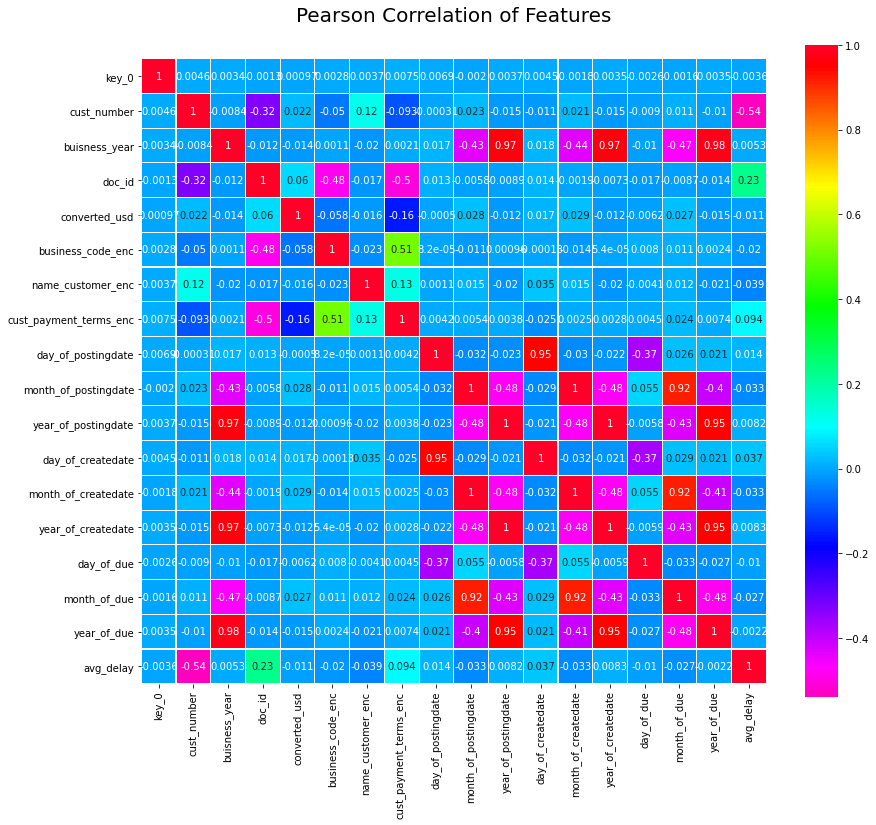

In [87]:
colormap = plt.cm.RdBu
plt.figure(figsize=(14,12))
plt.title('Pearson Correlation of Features', y=1.05, size=20)
sns.heatmap(x_train.merge(y_train , on = x_train.index ).corr(),linewidths=0.1,vmax=1.0, 
            square=True, cmap='gist_rainbow_r', linecolor='white', annot=True)

#### Calling variance threshold for threshold value = 0.8

- Note -  Fill in the blanks to call the appropriate method

In [88]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(0.8)
sel.fit(x_train)

VarianceThreshold(threshold=0.8)

In [89]:
sel.variances_

array([1.78463462e+15, 1.16473745e-01, 8.83671780e+16, 1.28893751e+09,
       2.87558066e-01, 1.05387771e+06, 1.38897414e+02, 7.57805831e+01,
       1.23279281e+01, 1.16787243e-01, 7.73591194e+01, 1.23358191e+01,
       1.16914439e-01, 7.64488825e+01, 1.21359732e+01, 1.19958707e-01])

### Important features columns are 
- 'year_of_createdate' 
- 'year_of_due'
- 'day_of_createdate'
- 'year_of_postingdate'
- 'month_of_due'
- 'month_of_createdate'

# Modelling 

#### Now you need to compare with different machine learning models, and needs to find out the best predicted model

- Linear Regression
- Decision Tree Regression
- Random Forest Regression
- Support Vector Regression
- Extreme Gradient Boost Regression 

### You need to make different blank list for different evaluation matrix 

- MSE
- R2
- Algorithm

In [90]:
MSE_Score = []
R2_Score = []
Algorithm = []
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### You need to start with the baseline model Linear Regression

- Step 1 : Call the Linear Regression from sklearn library
- Step 2 : make an object of Linear Regression 
- Step 3 : fit the x_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the x_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [91]:
from sklearn.linear_model import LinearRegression
Algorithm.append('LinearRegression')
regressor = LinearRegression()
regressor.fit(x_train, y_train)
predicted= regressor.predict(x_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

In [92]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [93]:
predict_test= regressor.predict(x_val)
mean_squared_error(y_val, predict_test, squared=False)

584646.6933968455

### Display The Comparison Lists

In [94]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression'],[253809252380.57538],[0.3357812009128551],

### You need to start with the baseline model Support Vector Regression

- Step 1 : Call the Support Vector Regressor from sklearn library
- Step 2 : make an object of SVR
- Step 3 : fit the x_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the x_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

In [97]:
from sklearn.svm import SVR
Algorithm.append('Support Vector Regressor')
regressor = SVR()
regressor.fit(x_train, y_train)
predicted= regressor.predict(x_test)

C:\Users\Uday Krishna\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


### Check for the 

- Mean Square Error
- R Square Error 

for "y_test" and "predicted" dataset and store those data inside respective list for comparison 

In [98]:
MSE_Score.append(mean_squared_error(y_test, predicted))
R2_Score.append(r2_score(y_test, predicted))

### Check the same for the Validation set also 

In [99]:
predict_test= regressor.predict(x_val)
mean_squared_error(y_val, predict_test, squared=False)

717732.3654306808

### Display The Comparison Lists

In [100]:
for i in Algorithm, MSE_Score, R2_Score:
    print(i,end=',')

['LinearRegression', 'Support Vector Regressor'],[253809252380.57538, 383688806782.519],[0.3357812009128551, -0.004113585591920765],

### Your next model would be Decision Tree Regression

- Step 1 : Call the Decision Tree Regressor from sklearn library
- Step 2 : make an object of Decision Tree
- Step 3 : fit the x_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the x_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

### Check the same for the Validation set also 

### Display The Comparison Lists

### Your next model would be Random Forest Regression

- Step 1 : Call the Random Forest Regressor from sklearn library
- Step 2 : make an object of Random Forest
- Step 3 : fit the x_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the x_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

### Check the same for the Validation set also 

### Display The Comparison Lists


### The last but not the least model would be xGBoost or Extreme Gradient Boost Regression

- Step 1 : Call the xGBoost Regressor from xgb library
- Step 2 : make an object of xgboost
- Step 3 : fit the x_train and y_train dataframe into the object 
- Step 4 : Predict the output by passing the x_test Dataset into predict function




- Note - Append the Algorithm name into the algorithm list for tracking purpose### Extreme Gradient Boost Regression
- Note -  No need to change the code 

In [ ]:
import xgboost as xgb
Algorithm.append('xGB Regressor')
regressor = xgb.xGBRegressor()
regressor.fit(x_train, y_train)
predicted = regressor.predict(x_test)

### Check for the 

- Mean Square Error
- R Square Error 

for y_test and predicted dataset and store those data inside respective list for comparison 

### Check the same for the Validation set also 

### Display The Comparison Lists


## You need to make the comparison list into a comparison dataframe 

## Now from the Comparison table, you need to choose the best fit model

- Step 1 - Fit x_train and y_train inside the model 
- Step 2 - Predict the x_test dataset
- Step 3 - Predict the x_val dataset


- Note - No need to change the code

In [ ]:
regressorfinal = xgb.xGBRegressor()
regressorfinal.fit(x_train, y_train)
predictedfinal = regressorfinal.predict(x_test)
predict_testfinal = regressorfinal.predict(x_val)

### Calculate the Mean Square Error for test dataset

- Note - No need to change the code

In [ ]:
mean_squared_error(y_test,predictedfinal,squared=False)

### Calculate the mean Square Error for validation dataset

### Calculate the R2 score for test

### Calculate the R2 score for Validation

### Calculate the Accuracy for train Dataset 

### Calculate the accuracy for validation

### Calculate the accuracy for test

## Specify the reason behind choosing your machine learning model 

- Note : Provide your answer as a text here

## Now you need to pass the Nulldata dataframe into this machine learning model

#### In order to pass this Nulldata dataframe into the ML model, we need to perform the following

- Step 1 : Label Encoding 
- Step 2 : Day, Month and Year extraction 
- Step 3 : Change all the column data type into int64 or float64
- Step 4 : Need to drop the useless columns 

### Display the Nulldata 

### Check for the number of rows and columns in the nulldata

### Check the Description and Information of the nulldata 

### Storing the Nulldata into a different dataset 
# for BACKUP

### Call the Label Encoder for Nulldata

- Note - you are expected to fit "business_code" as it is a categorical variable
- Note - No need to change the code

In [ ]:
from sklearn.preprocessing import LabelEncoder
business_codern = LabelEncoder()
business_codern.fit(nulldata['business_code'])
nulldata['business_code_enc'] = business_codern.transform(nulldata['business_code'])

### Now you need to manually replacing str values with numbers
- Note - No need to change the code

In [ ]:
nulldata['cust_number'] = nulldata['cust_number'].str.replace('CCCA',"1").str.replace('CCU',"2").str.replace('CC',"3").astype(int)

## You need to extract day, month and year from the "clear_date", "posting_date", "due_in_date", "baseline_create_date" columns


##### 1.   Extract day from "clear_date" column and store it into 'day_of_cleardate'
##### 2.   Extract month from "clear_date" column and store it into 'month_of_cleardate'
##### 3.   Extract year from "clear_date" column and store it into 'year_of_cleardate'



##### 4.   Extract day from "posting_date" column and store it into 'day_of_postingdate'
##### 5.   Extract month from "posting_date" column and store it into 'month_of_postingdate'
##### 6.   Extract year from "posting_date" column and store it into 'year_of_postingdate'




##### 7.   Extract day from "due_in_date" column and store it into 'day_of_due'
##### 8.   Extract month from "due_in_date" column and store it into 'month_of_due'
##### 9.   Extract year from "due_in_date" column and store it into 'year_of_due'




##### 10.   Extract day from "baseline_create_date" column and store it into 'day_of_createdate'
##### 11.   Extract month from "baseline_create_date" column and store it into 'month_of_createdate'
##### 12.   Extract year from "baseline_create_date" column and store it into 'year_of_createdate'




- Note - You are supposed To use - 

*   dt.day
*   dt.month
*   dt.year

### Use Label Encoder1 of all the following columns - 
- 'cust_payment_terms' and store into 'cust_payment_terms_enc'
- 'business_code' and store into 'business_code_enc'
- 'name_customer' and store into 'name_customer_enc'

Note - No need to change the code

In [ ]:
nulldata['cust_payment_terms_enc']=label_encoder1.transform(nulldata['cust_payment_terms'])
nulldata['business_code_enc']=label_encoder1.transform(nulldata['business_code'])
nulldata['name_customer_enc']=label_encoder.transform(nulldata['name_customer'])


### Check for the datatypes of all the columns of Nulldata

### Now you need to drop all the unnecessary columns - 

- 'business_code'
- "baseline_create_date"
- "due_in_date"
- "posting_date"
- "name_customer"
- "clear_date"
- "cust_payment_terms"
- 'day_of_cleardate'
- "month_of_cleardate"
- "year_of_cleardate"

### Check the information of the "nulldata" dataframe

### Compare "nulldata" with the "x_test" dataframe 

- use info() method

### You must have noticed that there is a mismatch in the column sequence while compairing the dataframes

- Note - In order to fed into the machine learning model, you need to edit the sequence of "nulldata", similar to the "x_test" dataframe

- Display all the columns of the x_test dataframe 
- Display all the columns of the Nulldata dataframe 
- Store the Nulldata with new sequence into a new dataframe 


- Note - The code is given below, no need to change 

In [ ]:
x_test.columns

In [ ]:
nulldata.columns

In [ ]:
nulldata2=nulldata[['cust_number', 'buisness_year', 'doc_id', 'converted_usd',
       'business_code_enc', 'name_customer_enc', 'cust_payment_terms_enc',
       'day_of_postingdate', 'month_of_postingdate', 'year_of_postingdate',
       'day_of_createdate', 'month_of_createdate', 'year_of_createdate',
       'day_of_due', 'month_of_due', 'year_of_due']]

### Display the Final Dataset

### Now you can pass this dataset into you final model and store it into "final_result"

### you need to make the final_result as dataframe, with a column name "avg_delay"

- Note - No need to change the code

In [ ]:
final_result = pd.Series(final_result,name='avg_delay')

### Display the "avg_delay" column

### Now you need to merge this final_result dataframe with the BACKUP of "nulldata" Dataframe which we have created in earlier steps

In [ ]:
nulldata1.reset_index(drop=True,inplace=True)
Final = nulldata1.merge(final_result , on = nulldata.index )

### Display the "Final" dataframe 

### Check for the Number of Rows and Columns in your "Final" dataframe 

### Now, you need to do convert the below fields back into date and time format 

- Convert "due_in_date" into datetime format
- Convert "avg_delay" into datetime format
- Create a new column "clear_date" and store the sum of "due_in_date" and "avg_delay"
- display the new "clear_date" column
- Note - Code is given below, no need to change 

In [ ]:
Final['clear_date'] = pd.to_datetime(Final['due_in_date']) + pd.to_timedelta(Final['avg_delay'], unit='s')

### Display the "clear_date" column

### Convert the average delay into number of days format 

- Note - Formula = avg_delay//(24 * 3600)
- Note - full code is given for this, no need to change 

In [ ]:
Final['avg_delay'] = Final.apply(lambda row: row.avg_delay//(24 * 3600), axis = 1)

### Display the "avg_delay" column 

### Now you need to convert average delay column into bucket

- Need to perform binning 
- create a list of bins i.e. bins= [0,15,30,45,60,100]
- create a list of labels i.e. labels = ['0-15','16-30','31-45','46-60','Greatar than 60']
- perform binning by using cut() function from "Final" dataframe


- Please fill up the first two rows of the code

In [ ]:

bins= ___________________
labels =__________________________
Final['Aging Bucket'] = pd.cut(Final['avg_delay'], bins=bins, labels=labels, right=False)

### Now you need to drop "key_0" and "avg_delay" columns from the "Final" Dataframe

### Display the count of each categoty of new "Aging Bucket" column 

### Display your final dataset with aging buckets 

### Store this dataframe into the .csv format

# END OF THE PROJECT